# Classification models and NLP in R
***This is the follow-up notebook, in which we're going to perform classification on the dataset we constructed in the previous notebook.***

In [1]:
library(caret)
library(ggplot2)
install.packages('e1071', dependencies = TRUE)
install.packages('kernlab', dependencies = TRUE)

X_train <- read.csv('xtrain.csv', header = TRUE)
X_train <- data.frame(X_train)

X_test <- read.csv('xtest.csv', header = TRUE)
X_test <- data.frame(X_test)

y_train <- read.csv('ytrain.csv', header = TRUE)
y_train <- data.frame(y_train)

y_test <- read.csv('ytest.csv', header = TRUE)
y_test <- data.frame(y_test)

Loading required package: lattice
Loading required package: ggplot2
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
head(X_train)

X     peri_title comm_title ques_title excl_title peri_text comm_text
1 35641 0          1          0          1          24        17       
2 43780 0          0          0          0           4         6       
3 19131 0          0          0          0           5         6       
4 30005 0          0          1          0          25        36       
5 13663 0          1          0          0          32        45       
6 33686 0          0          0          0          27        19       
  ques_text excl_text title_length text_length title_words
1 3         0         150          2571        23         
2 0         0          80           959        12         
3 0         0          79           822        13         
4 1         1          80          2628        11         
5 0         0          72          3441        11         
6 0         0         106          2721        12

In [3]:
class(X_train)

[1] "data.frame"

In [4]:
head(y_test)

X     is_fake
1 34059 1      
2 10347 0      
3 25271 1      
4  1750 0      
5 29550 1      
6 39599 1

In [5]:
class(y_test)

[1] "data.frame"

In [6]:
head(X_test)

X     peri_title comm_title ques_title excl_title peri_text comm_text
1 34059 0          2          0          0          51        42       
2 10347 0          0          0          0           4         2       
3 25271 0          0          0          0          12        16       
4  1750 2          1          0          0          23        23       
5 29550 0          1          0          0          19        21       
6 39599 0          0          0          1          13        21       
  ques_text excl_text title_length text_length title_words
1 3         0         125          4473        17         
2 0         0          56           518         9         
3 1         1         103          1877        17         
4 0         0          68          3595         8         
5 2         0          81          2615        13         
6 0         0         135          2143        18

In [7]:
head(y_train)

X     is_fake
1 35641 1      
2 43780 1      
3 19131 0      
4 30005 1      
5 13663 0      
6 33686 1

In [8]:
train <- merge(X_train, y_train)
row.names(train) <- train$X
train <- train[-1]
train$is_fake <- as.factor(train$is_fake)
head(train)

peri_title comm_title ques_title excl_title peri_text comm_text ques_text
0 2          1          0          0          49        54        0        
1 2          0          0          0          37        29        0        
2 3          0          0          0          22        19        0        
4 0          0          0          0          58        51        1        
5 0          2          0          0          36        31        0        
7 0          1          0          0          12         9        1        
  excl_text title_length text_length title_words is_fake
0 0         64           4659        10          0      
1 0         64           4077         9          0      
2 0         60           2789        10          0      
4 1         69           5204        11          0      
5 0         64           3707         9          0      
7 2         60            856        10          0

In [9]:
test <- merge(X_test, y_test)
row.names(test) <- test$X
test = test[-1]
test$is_fake <- as.factor(test$is_fake)
head(test)

peri_title comm_title ques_title excl_title peri_text comm_text ques_text
3  0          0          0          0          21        23        0        
6  0          1          0          0          36        22        0        
11 0          0          0          0          37        34        0        
31 0          0          0          0          14        15        0        
33 0          0          0          0          22        16        0        
36 0          1          0          0          33        27        0        
   excl_text title_length text_length title_words is_fake
3  0         59           2461         9          0      
6  0         63           3220        11          0      
11 0         73           3829        10          0      
31 0         53           1375         8          0      
33 0         68           2039        10          0      
36 0         67           3423        10          0

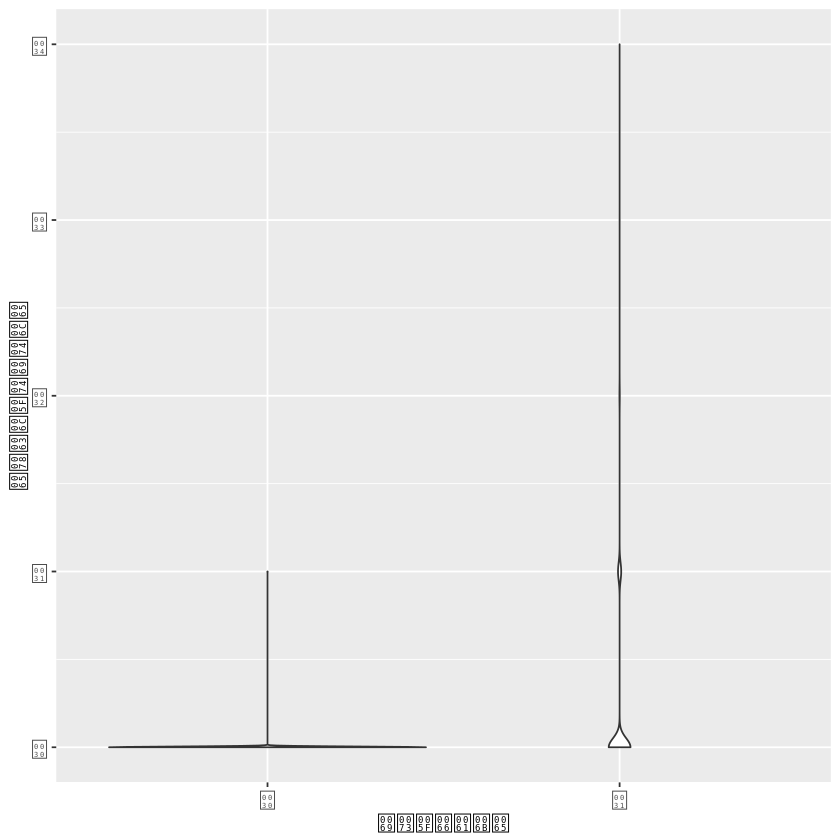

In [10]:
p <- ggplot(train, aes(x = is_fake, y = excl_title)) +
    geom_violin()

p

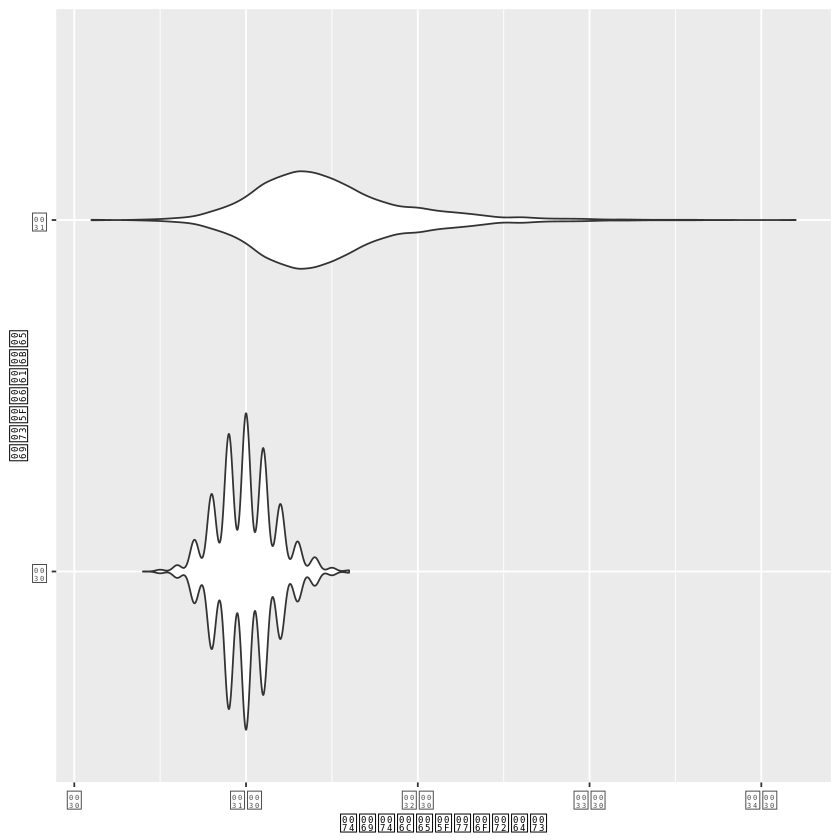

In [11]:
pz <- ggplot(test, aes(x = is_fake, y = title_words)) +
    geom_violin() +
    coord_flip()

pz

In [12]:
summary(train)

   peri_title       comm_title       ques_title        excl_title     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.2742   Mean   :0.2248   Mean   :0.04198   Mean   :0.08185  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :6.0000   Max.   :5.0000   Max.   :3.00000   Max.   :4.00000  
   peri_text        comm_text        ques_text       excl_text       
 Min.   :  0.00   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0000  
 1st Qu.: 10.00   1st Qu.:  8.00   1st Qu.: 0.00   1st Qu.:  0.0000  
 Median : 18.00   Median : 17.00   Median : 0.00   Median :  0.0000  
 Mean   : 20.95   Mean   : 20.24   Mean   : 0.68   Mean   :  0.4075  
 3rd Qu.: 27.00   3rd Qu.: 26.00   3rd Qu.: 1.00   3rd Qu.:  0.0000  
 Max.   :555.00   Max.   :518.00   Max.   :94.00   Max.   :133.0000  
  title_lengt

In [13]:
sapply(train, class)

peri_title   comm_title   ques_title   excl_title    peri_text    comm_text 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer" 
   ques_text    excl_text title_length  text_length  title_words      is_fake 
   "integer"    "integer"    "integer"    "integer"    "integer"     "factor"

In [14]:
validation_index <- createDataPartition(train$is_fake, p = 0.80, list = FALSE)
validation <- train[-validation_index,]
train <- train[validation_index,]

In [15]:
control <- trainControl(method = 'cv', number = 10)
metric <- 'Accuracy'

***The datasets are imported successfully.***
## LDA, CART, KNN, SVM, RF

In [16]:
fit.lda <- train(is_fake~., data = train, method = 'lda', metric = metric, trControl = control)

fit.cart <- train(is_fake~., data = train, method = 'rpart', metric = metric, trControl = control)

fit.knn <- train(is_fake~., data = train, method = 'knn', metric = metric, trControl = control)

fit.svm <- train(is_fake~., data = train, method = 'svmRadial', metric = metric, trControl = control)

fit.rf <- train(is_fake~., data = train, method = 'rf', metric = metric, trControl = control)

In [17]:
results <- resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, svm = fit.svm, rf = fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.8625609 0.8669509 0.8698451 0.8704018 0.8749130 0.8771319    0
cart 0.8465553 0.8591194 0.8607971 0.8600315 0.8626001 0.8681280    0
knn  0.8406402 0.8469370 0.8538622 0.8523755 0.8558998 0.8625131    0
svm  0.9032707 0.9077699 0.9093282 0.9088918 0.9100712 0.9140271    0
rf   0.9206681 0.9228427 0.9253525 0.9252482 0.9277076 0.9300383    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.7264001 0.7354018 0.7411618 0.7421996 0.7511169 0.7554915    0
cart 0.6927565 0.7178026 0.7208650 0.7195123 0.7244680 0.7356729    0
knn  0.6827431 0.6950441 0.7087412 0.7058048 0.7129214 0.7257035    0
svm  0.8066815 0.8157022 0.8188876 0.8179591 0.8203597 0.8282201    0
rf   0.8411583 0.8454526 0.8505449 0.8503200 0.8552480 0.8599368    0


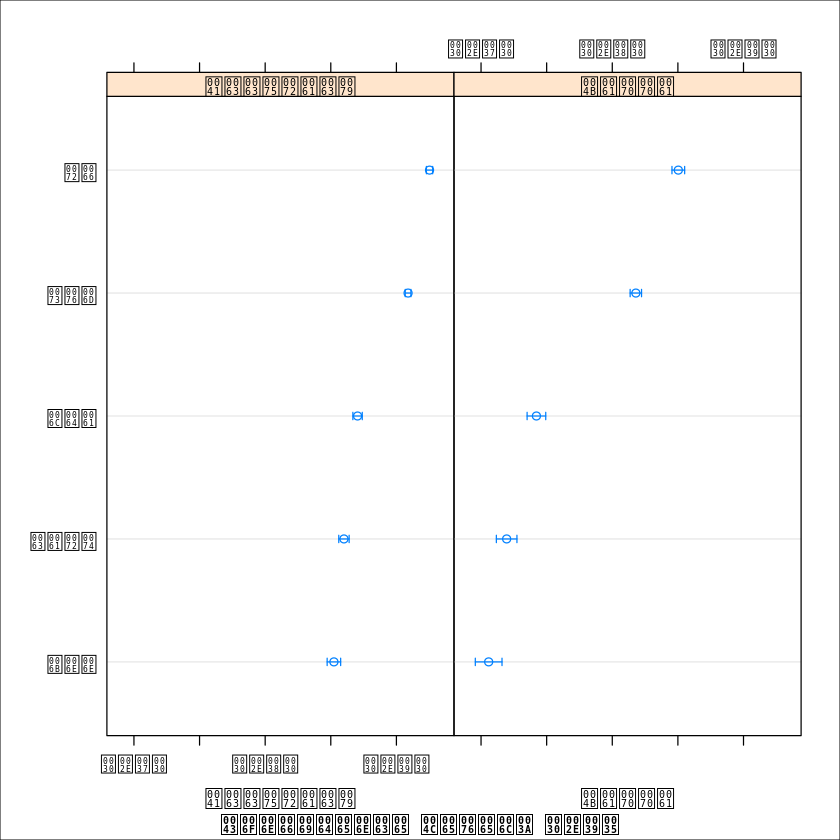

In [18]:
dotplot(results)

***It appears Random Forests have the highest accuracy of all five algorithms, placed at ~0.925. Let's make predictions on the test set using that model.***

In [19]:
print(fit.rf)

Random Forest 

28735 samples
   11 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 25862, 25861, 25861, 25862, 25861, 25862, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9183229  0.8366735
   6    0.9252482  0.8503200
  11    0.9235082  0.8468105

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


In [20]:
predictions <- predict(fit.rf, validation)
confusionMatrix(predictions, validation$is_fake)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3206  332
         1  216 3429
                                          
               Accuracy : 0.9237          
                 95% CI : (0.9173, 0.9297)
    No Information Rate : 0.5236          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8473          
                                          
 Mcnemar's Test P-Value : 8.99e-07        
                                          
            Sensitivity : 0.9369          
            Specificity : 0.9117          
         Pos Pred Value : 0.9062          
         Neg Pred Value : 0.9407          
             Prevalence : 0.4764          
         Detection Rate : 0.4463          
   Detection Prevalence : 0.4926          
      Balanced Accuracy : 0.9243          
                                          
       'Positive' Class : 0               
                        

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


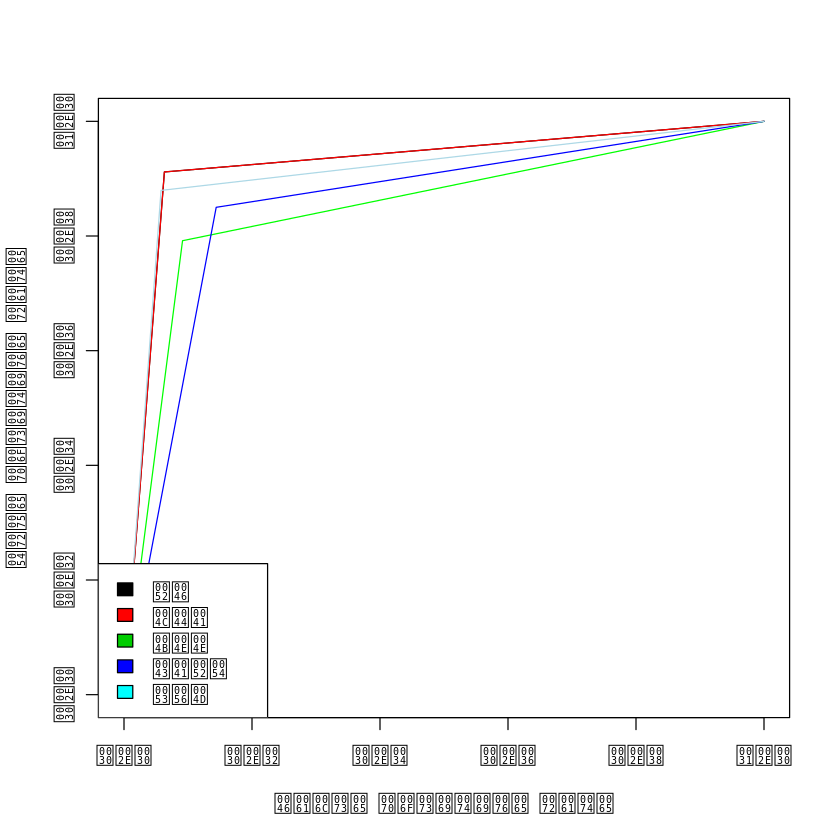

In [21]:
install.packages('ROCR')
library(ROCR)

colors <- c('black', 'red', 'green', 'blue', 'lightblue')
m <- length(predictions)

# rf predictions
predvec <- ifelse(predictions == '1', 1, 0)
realvec <- ifelse(validation$is_fake == '1', 1, 0)
pred <- prediction(predvec, realvec)
perf <- performance(pred, 'tpr', 'fpr')
plot(perf, col = colors[1])

# lda predictions
lda_predictions <- predict(fit.rf, validation)
lda_predvec <- ifelse(lda_predictions == '1', 1, 0)
lda_pred <- prediction(lda_predvec, realvec)
lda_perf <- performance(lda_pred, 'tpr', 'fpr')
plot(lda_perf, add = TRUE, col = colors[2])

# knn predictions
knn_predictions <- predict(fit.knn, validation)
knn_predvec <- ifelse(knn_predictions == '1', 1, 0)
knn_pred <- prediction(knn_predvec, realvec)
knn_perf <- performance(knn_pred, 'tpr', 'fpr')
plot(knn_perf, add = TRUE, col = colors[3])

# cart predictions
cart_predictions <- predict(fit.cart, validation)
cart_predvec <- ifelse(cart_predictions == '1', 1, 0)
cart_pred <- prediction(cart_predvec, realvec)
cart_perf <- performance(cart_pred, 'tpr', 'fpr')
plot(cart_perf, add = TRUE, col = colors[4])

# svm predictions
svm_predictions <- predict(fit.svm, validation)
svm_predvec <- ifelse(svm_predictions == '1', 1, 0)
svm_pred <- prediction(svm_predvec, realvec)
svm_perf <- performance(svm_pred, 'tpr', 'fpr')
plot(svm_perf, add = TRUE, col = colors[5])

legend(x = 'bottomleft', legend = c('RF', 'LDA', 'KNN', 'CART', 'SVM'), fill = 1:m)

***So, to summarize the work done in the last notebook and this one so far, we engineered our own features from the datasets and managed to attain 92%+ accuracy when classifying. Next, we're going to apply other NLP methods and see if we can get even better results.***

In [22]:
true_news <- read.csv('news/True.csv')
fake_news <- read.csv('news/Fake.csv')

In [23]:
head(true_news)

title                                                                
1 As U.S. budget fight looms, Republicans flip their fiscal script     
2 U.S. military to accept transgender recruits on Monday: Pentagon     
3 Senior U.S. Republican senator: 'Let Mr. Mueller do his job'         
4 FBI Russia probe helped by Australian diplomat tip-off: NYT          
5 Trump wants Postal Service to charge 'much more' for Amazon shipments
6 White House, Congress prepare for talks on spending, immigration     
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [24]:
head(fake_news)

title                                                                                     
1  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing           
2  Drunk Bragging Trump Staffer Started Russian Collusion Investigation                     
3  Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’
4  Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)            
5  Pope Francis Just Called Out Donald Trump During His Christmas Speech                    
6  Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES)        
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [25]:
true_news$is_fake <- 0
fake_news$is_fake <- 1

#true_news$ID <- seq.int(nrow(true_news))
#fake_news$ID <- seq.int(from = nrow(true_news) + 1, to = nrow(true_news) + nrow(fake_news))
news <- rbind(true_news, fake_news)

news$ID <- seq.int(nrow(news))
news <- news[sample(nrow(news)),]
head(news)

title                                                                                                          
33590 JUDGE JEANINE TELLS THE LEFT TO KNOCK IT OFF: “It’s time for the left to unite behind the 45th President Elect”
5373  Illinois governor's bid to sell state-owned high-rise gains boost                                              
19795 U.S. bombers, fighter jets in bombing drill over Korean peninsula: South Korea                                 
23485  BUSTED: Republican Conspired With Aide To Label Angry Constituents ‘Un-American’ For Booing Him               
20211 Erdogan adviser sees recovery in Turkey ties with Germany, EU                                                  
33730 PRESIDENT-ELECT DONALD J TRUMP’S Thanksgiving Message To America [Video]                                       
      text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
33590 Judge Jeanine Pirro has had it with the left and their disrespectful attitude towards Trump. Her Opening Statement:  There was a time in this country when we were united behind the flag in celebration of America s new president  it s time for the left, assuming they re capable, to show the same dignity and class, to the 45th President-Elect.                                                                                                                                 

In [26]:
dim(news)

[1] 44898     6

***It appears the combined dataset has 44898 columns. We're going to use 36898 for training and the remaining 8000 for testing.***

In [27]:
# set numerical IDs for each data example
news$ID <- seq.int(nrow(news))
TRAINING_EXAMPLES <- 36898

all_ids <- news$ID
train_ids <- sample(all_ids, TRAINING_EXAMPLES)
test_ids <- setdiff(all_ids, train_ids)
train <- news[train_ids, ]
test <- news[test_ids, ]

In [28]:
dim(train)

[1] 36898     6

In [29]:
dim(test)

[1] 8000    6

## Vocabulary-based vectorization
***Let’s first create a vocabulary-based DTM. Here we collect unique terms from all documents and mark each of them with a unique ID using the create_vocabulary() function. We use an iterator to create the vocabulary.***

In [30]:
install.packages('text2vec')
install.packages('data.table')
install.packages('magrittr')

library(text2vec)
library(data.table)
library(magrittr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [31]:
prep_func <- tolower
tok_func <- word_tokenizer

train$text <- as.character(train$text)
it_train <- itoken(train$text,   # token iterator
                   preprocessor = prep_func,
                   tokenizer = tok_func,
                   ids = train$ID)
vocab <- create_vocabulary(it_train)

In [32]:
vocab

term       term_count doc_count
1      0.00000017 1          1        
2      0.001      1          1        
3      0.0011     1          1        
4      0.0018     1          1        
5      0.006      1          1        
6      0.0075     1          1        
7      0.0076     1          1        
8      0.11       1          1        
9      0.14       1          1        
10     0.189      1          1        
11     0.19       1          1        
12     0.22       1          1        
13     0.24       1          1        
14     0.35       1          1        
15     0.45       1          1        
16     0.48       1          1        
17     0.51       1          1        
18     0.54       1          1        
19     0.65       1          1        
20     0.66       1          1        
21     0.67       1          1        
22     0.68       1          1        
23     0.6861     1          1        
24     0.6878     1          1        
25     0.69       1          1        
26     0.6940     1          1        
27     0.6971     1          1        
28     0.7003     1          1        
29     0.7063     1          1        
30     0.7071     1          1        
...    ...        ...        ...      
182840 an          55594     23744    
182841 who         57569     22396    
182842 are         59689     22014    
182843 at          61693     24317    
182844 this        62944     23586    
182845 from        65852     24639    
182846 not         66899     24701    
182847 have        67770     24538    
182848 be          68494     24756    
182849 has         72760     25032    
182850 by          78482     26299    
182851 his         78919     21806    
182852 as          85223     26219    
182853 was         95287     26311    
182854 with        96581     28650    
182855 trump       97626     17828    
182856 it         103533     27849    
182857 said       106614     26714    
182858 he         107726     24283    
182859 is         137022     29887    
182860 for        141901     30812    
182861 s          144506     24702    
182862 on         156445     33691    
182863 that       194794     31645    
182864 in         285817     34258    
182865 and        334803     34312    
182866 a          337078     34904    
182867 of         362888     34633    
182868 to         439580     35034    
182869 the        830717     35833

***We can observe some pretty expectable results : Most of the top frequency words are in fact stop words. There also seem to be a certain amount of numerical tokens(0.11, 0.5573 etc.). I find them very irrelevant, so I'll have the removed.*** 

In [33]:
sapply(vocab, class)

term  term_count   doc_count 
"character"   "integer"   "integer"

In [34]:
vocab <- vocab[!grepl('[[:digit:]]', vocab$term),]

In [35]:
vocab

term                                                                                         
6257   _______                                                                                      
6258   __________________________                                                                   
6259   _____________________________________________________________________________________featured
6260   _____________________________________________________________________________________photo   
6261   ____________________________________________________________________________________image    
6262   __saada                                                                                      
6263   _a_w_w_r_                                                                                    
6264   _ad_container                                                                                
6265   _all_                                                                                        
6266   _americasidiot                                                                               
6267   _anyone_                                                                                     
6268   _bigger_                                                                                     
6269   _brendancarroll                                                                              
6270   _elizabethmay                                                                                
6271   _habibilicious_                                                                              
6272   _js                                                                                          
6273   _julian_nyc                                                                                  
6274   _juliannemoore                                                                               
6275   _julmplporw                                                                                  
6277   _known_                                                                                      
6278   _makada_                                                                                     
6281   _nackt                                                                                       
6282   _o                                                                                           
6283   _only_                                                                                       
6284   _r                                                                                           
6285   _stephenward                                                                                 
6286   _terrible_                                                                                   
6287   _trump                                                                                       
6288   _under_current                                                                               
6289   _your                                                                                        
...    ...                                                                                          
182840 an                                                                                           
182841 who                                                                                          
182842 are                                                                                          
182843 at                                                                                           
182844 this                                                                                         
182845 from                                                                                         
182846 not                                                                                          
182847 have                                                         

In [36]:
vocab <- vocab[!grepl('_', vocab$term),]

In [37]:
vocab

term                        term_count doc_count
6290   a.a:this.b                  1          1        
6291   a.aa                        1          1        
6293   a.appendchild               1          1        
6294   a.back                      1          1        
6295   a.bind                      1          1        
6296   a.c.style.display           1          1        
6297   a.call.apply                1          1        
6298   a.charcodeat                1          1        
6300   a.complete                  1          1        
6303   a.currentstyle              1          1        
6304   a.document.body             1          1        
6305   a.document.createelement    1          1        
6306   a.enabledplugin             1          1        
6307   a.enabledplugin.description 1          1        
6308   a.exec                      1          1        
6309   a.filename                  1          1        
6310   a.firstchild                1          1        
6311   a.g.foreachad               1          1        
6312   a.g.listenonobject          1          1        
6313   a.getboundingclientrect     1          1        
6315   a.h                         1          1        
6316   a.id                        1          1        
6317   a.innertext.replace         1          1        
6318   a.j.style.display           1          1        
6319   a.joe                       1          1        
6320   a.k.m                       1          1        
6321   a.lastindexof               1          1        
6322   a.linenumber                1          1        
6323   a.m.after                   1          1        
6324   a.m.as                      1          1        
...    ...                         ...        ...      
182840 an                           55594     23744    
182841 who                          57569     22396    
182842 are                          59689     22014    
182843 at                           61693     24317    
182844 this                         62944     23586    
182845 from                         65852     24639    
182846 not                          66899     24701    
182847 have                         67770     24538    
182848 be                           68494     24756    
182849 has                          72760     25032    
182850 by                           78482     26299    
182851 his                          78919     21806    
182852 as                           85223     26219    
182853 was                          95287     26311    
182854 with                         96581     28650    
182855 trump                        97626     17828    
182856 it                          103533     27849    
182857 said                        106614     26714    
182858 he                          107726     24283    
182859 is                          137022     29887    
182860 for                         141901     30812    
182861 s                           144506     24702    
182862 on                          156445     33691    
182863 that                        194794     31645    
182864 in                          285817     34258    
182865 and                         334803     34312    
182866 a                           337078     34904    
182867 of                          362888     34633    
182868 to                          439580     35034    
182869 the                         830717     35833

In [38]:
vocab <- vocab[!grepl('[.:@#%,]', vocab$term),]
vocab

term            term_count doc_count
6404   aaaaackkk       1          1        
6405   aaaaapkfhk      1          1        
6406   aaaarrgh        1          1        
6407   aaarf           1          1        
6408   aaba            1          1        
6409   aaccording      1          1        
6412   aahwuhvvnh      1          1        
6413   aaja            1          1        
6414   aalberg         1          1        
6415   aalberts        1          1        
6416   aaldef          1          1        
6417   aaliyah         1          1        
6418   aammir          1          1        
6419   aamom           1          1        
6420   aan             1          1        
6423   aardal          1          1        
6424   aargh           1          1        
6427   aaroncovfefe    1          1        
6428   aaroncynic      1          1        
6429   aaronshhh       1          1        
6430   aarti           1          1        
6437   abaaouddinajpur 1          1        
6438   abacus          1          1        
6440   abadie          1          1        
6441   abady           1          1        
6442   abair           1          1        
6446   abaonded        1          1        
6447   abaribe         1          1        
6448   abatembo        1          1        
6449   abayomi         1          1        
...    ...             ...        ...      
182840 an               55594     23744    
182841 who              57569     22396    
182842 are              59689     22014    
182843 at               61693     24317    
182844 this             62944     23586    
182845 from             65852     24639    
182846 not              66899     24701    
182847 have             67770     24538    
182848 be               68494     24756    
182849 has              72760     25032    
182850 by               78482     26299    
182851 his              78919     21806    
182852 as               85223     26219    
182853 was              95287     26311    
182854 with             96581     28650    
182855 trump            97626     17828    
182856 it              103533     27849    
182857 said            106614     26714    
182858 he              107726     24283    
182859 is              137022     29887    
182860 for             141901     30812    
182861 s               144506     24702    
182862 on              156445     33691    
182863 that            194794     31645    
182864 in              285817     34258    
182865 and             334803     34312    
182866 a               337078     34904    
182867 of              362888     34633    
182868 to              439580     35034    
182869 the             830717     35833

***We've removed all weird entries containing symbols, numbers etc. There also seem to be some weirdly spelled words, which we'll try to remove by removing the entries appearing less than 5 times throughout the entire dataset and/or less than 5 documents as they are likely not of any use to us.***

In [39]:
vocab <- vocab[vocab$term_count > 5, ]
vocab

term         term_count doc_count
142375 abacha       6          2        
142376 abcliz       6          5        
142377 abdalla      6          3        
142378 abdelaziz    6          6        
142379 abdelkader   6          2        
142380 abdikadir    6          6        
142381 abdirahaman  6          2        
142382 abdulahi     6          6        
142383 abedin’s     6          5        
142384 abettors     6          3        
142385 abi          6          6        
142386 ablin        6          5        
142387 aborting     6          5        
142389 abou         6          6        
142390 aboul        6          5        
142391 abridged     6          5        
142392 abrogate     6          6        
142393 absorbing    6          6        
142394 abukar       6          4        
142395 academically 6          6        
142396 aca’s        6          4        
142397 accents      6          6        
142399 accommodates 6          6        
142400 aclu’s       6          5        
142401 actblue      6          1        
142403 activating   6          6        
142404 actuarial    6          5        
142405 acura        6          2        
142409 ade          6          6        
142410 adherent     6          6        
...    ...          ...        ...      
182840 an            55594     23744    
182841 who           57569     22396    
182842 are           59689     22014    
182843 at            61693     24317    
182844 this          62944     23586    
182845 from          65852     24639    
182846 not           66899     24701    
182847 have          67770     24538    
182848 be            68494     24756    
182849 has           72760     25032    
182850 by            78482     26299    
182851 his           78919     21806    
182852 as            85223     26219    
182853 was           95287     26311    
182854 with          96581     28650    
182855 trump         97626     17828    
182856 it           103533     27849    
182857 said         106614     26714    
182858 he           107726     24283    
182859 is           137022     29887    
182860 for          141901     30812    
182861 s            144506     24702    
182862 on           156445     33691    
182863 that         194794     31645    
182864 in           285817     34258    
182865 and          334803     34312    
182866 a            337078     34904    
182867 of           362888     34633    
182868 to           439580     35034    
182869 the          830717     35833

In [40]:
vocab <- vocab[vocab$doc_count > 5, ]
vocab

term         term_count doc_count
142378 abdelaziz    6          6        
142380 abdikadir    6          6        
142382 abdulahi     6          6        
142385 abi          6          6        
142389 abou         6          6        
142392 abrogate     6          6        
142393 absorbing    6          6        
142395 academically 6          6        
142397 accents      6          6        
142399 accommodates 6          6        
142403 activating   6          6        
142409 ade          6          6        
142410 adherent     6          6        
142411 adirondacks  6          6        
142412 adjustable   6          6        
142415 admonition   6          6        
142416 admonitions  6          6        
142419 adorning     6          6        
142421 adulthood    6          6        
142423 afterthought 6          6        
142428 agit         6          6        
142432 ahh          6          6        
142433 ahhh         6          6        
142438 airpower     6          6        
142452 allianz      6          6        
142454 almazbek     6          6        
142455 alonzo       6          6        
142459 alteration   6          6        
142460 altercations 6          6        
142461 amazement    6          6        
...    ...          ...        ...      
182840 an            55594     23744    
182841 who           57569     22396    
182842 are           59689     22014    
182843 at            61693     24317    
182844 this          62944     23586    
182845 from          65852     24639    
182846 not           66899     24701    
182847 have          67770     24538    
182848 be            68494     24756    
182849 has           72760     25032    
182850 by            78482     26299    
182851 his           78919     21806    
182852 as            85223     26219    
182853 was           95287     26311    
182854 with          96581     28650    
182855 trump         97626     17828    
182856 it           103533     27849    
182857 said         106614     26714    
182858 he           107726     24283    
182859 is           137022     29887    
182860 for          141901     30812    
182861 s            144506     24702    
182862 on           156445     33691    
182863 that         194794     31645    
182864 in           285817     34258    
182865 and          334803     34312    
182866 a            337078     34904    
182867 of           362888     34633    
182868 to           439580     35034    
182869 the          830717     35833

In [41]:
vectorizer <- vocab_vectorizer(vocab)
dtm_train <- create_dtm(it_train, vectorizer)

In [42]:
dim(dtm_train)

[1] 36898 32778

In [43]:
identical(rownames(dtm_train), train$ID)

[1] FALSE

In [44]:
train$ID <- rownames(dtm_train)

## Logistic regression model on the DTM

In [45]:
install.packages('glmnet')
library(glmnet)
NFOLDS <- 10

train$is_fake <- as.factor(train$is_fake)
glmnet_classifier <- cv.glmnet(x = dtm_train, y = train[['is_fake']], 
                              family = 'binomial', 
                              # L1 penalty
                              alpha = 0.5,
                              # interested in the area under ROC curve
                              type.measure = 'auc',
                              # 10-fold cross-validation
                              nfolds = NFOLDS,
                              # high value is less accurate, but has faster training
                              thresh = 1e-4,
                              # again lower number of iterations for faster training
                              maxit = 7000)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Matrix
Loaded glmnet 4.1-1
Warning message:
“from glmnet Fortran code (error code -61); Convergence for 61th lambda value not reached after maxit=7000 iterations; solutions for larger lambdas returned”Warning message:
“from glmnet Fortran code (error code -51); Convergence for 51th lambda value not reached after maxit=7000 iterations; solutions for larger lambdas returned”

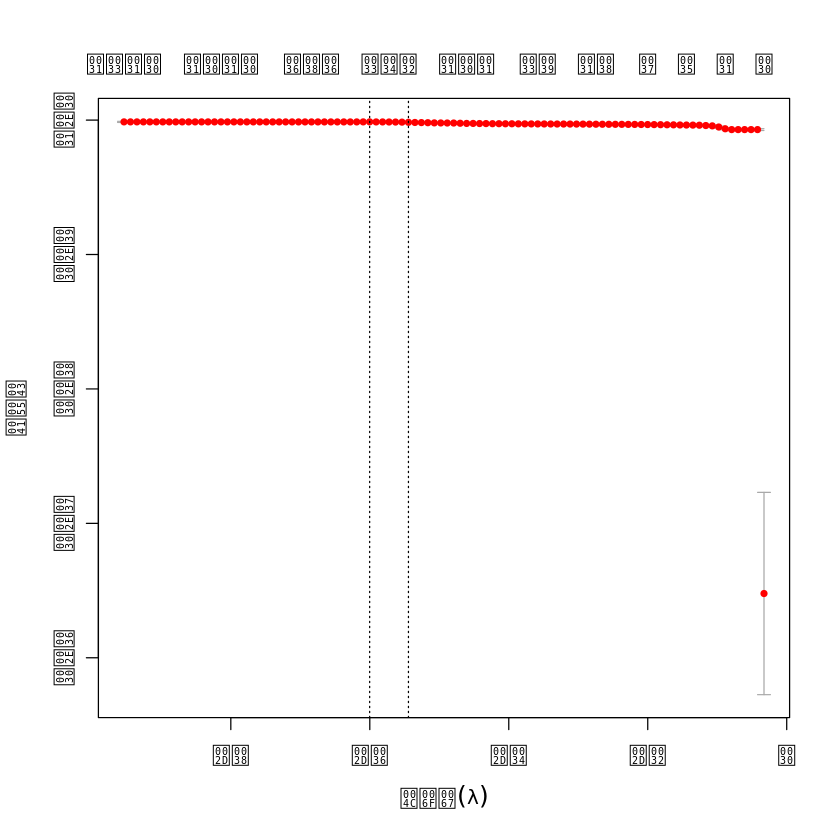

In [46]:
plot(glmnet_classifier)

In [47]:
it_test <- tok_func(prep_func(test$text))
# turn off progressbar because it won't look nice in rmd
it_test <- itoken(it_test, ids = test$ID, progressbar = FALSE)
         

dtm_test <- create_dtm(it_test, vectorizer)

preds <- predict(glmnet_classifier, dtm_test, type = 'response')[,1]
glmnet:::auc(test$is_fake, preds)

[1] 0.9981987

***And there we have it. 99.84% accuracy with just a simple DTM, without any stemming or stop words removal.***

In [48]:
install.packages('stopwords')
library(stopwords)

stop_words <- stopwords::stopwords('english')
head(stop_words, 20)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"

In [49]:
vocab <- create_vocabulary(it_train, stopwords = stop_words)
pruned_vocab <- prune_vocabulary(vocab, 
                                 term_count_min = 10, 
                                 doc_proportion_max = 0.5,
                                 doc_proportion_min = 0.001)
vectorizer <- vocab_vectorizer(pruned_vocab)

# create dtm_train with new pruned vocabulary vectorizer
dtm_train <- create_dtm(it_train, vectorizer)

In [50]:
dim(dtm_train)

[1] 36898 13829

In [51]:
dtm_test <- create_dtm(it_test, vectorizer)
dim(dtm_test)

[1]  8000 13829

***Here we used a different way of handling the data cleaning, the prune_vocabulary() function from text2vec package. We are left with almost three times less words with these parameters.***

## TF-IDF

In [52]:
tfidf <- TfIdf$new()

# fit model to train data and transform train data with fitted model
dtm_train_tfidf <- fit_transform(dtm_train, tfidf)

dtm_test_tfidf <- create_dtm(it_test, vectorizer)
dtm_test_tfidf <- transform(dtm_test_tfidf, tfidf)

In [53]:
tfidf_glmnet_classifier <- cv.glmnet(x = dtm_train_tfidf, y = train[['is_fake']], 
                              family = 'binomial', 
                              alpha = 0.5,
                              type.measure = 'auc',
                              nfolds = NFOLDS,
                              thresh = 1e-4,
                              maxit = 7000)

In [54]:
preds <- predict(tfidf_glmnet_classifier, dtm_test_tfidf, type = 'class')[,1]
glmnet:::auc(test$is_fake, preds)

[1] 0.9973531

In [55]:
precision <- posPredValue(as.factor(preds), as.factor(test$is_fake), positive = '0')
recall <- sensitivity(as.factor(preds), as.factor(test$is_fake), positive = '0')

F1 <- (2 * precision * recall) / (precision + recall)
F1

[1] 0.9972517

***We're getting insanely high both AUC and F1-Score. Just in case, let's manually check the first 100 predictions and compare them to the testing set.***